In [1]:
notebook7_url = "http://localhost:8888/tree?token=test-token"
default_result_path = None
close_on_fail = False
transition_timeout = 10000
default_delay = None

In [2]:
import tempfile

work_dir = tempfile.mkdtemp()
if default_result_path is None:
    default_result_path = work_dir
work_dir

'/var/folders/m0/myy2ys0s3cl_73__2gw8fw140000gn/T/tmp54d5qyc4'

# nbsearch E2E Test - Notebook Search on Notebook 7

- Test data to prepare: Test notebooks should be indexed in Solr
- Tests NBSearch on Jupyter Notebook 7 interface (/tree endpoint)

In [3]:
import importlib

import scripts.playwright
importlib.reload(scripts.playwright)

from scripts.playwright import *

await init_pw_context(close_on_fail=close_on_fail, last_path=default_result_path, delay=default_delay)

('20251021-132052',
 '/var/folders/m0/myy2ys0s3cl_73__2gw8fw140000gn/T/tmpvi_hz_ua')

## Open Jupyter Notebook 7 and wait for it to load

Start epoch: 1761020452.471505 seconds


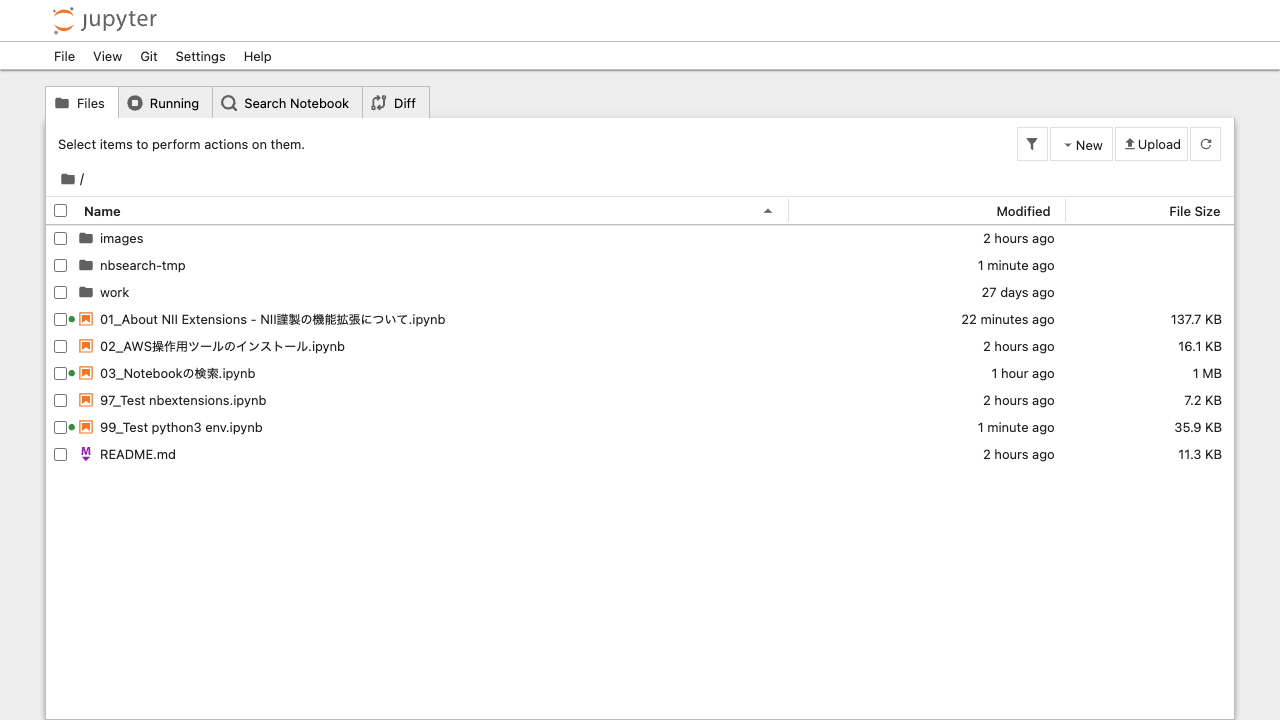

In [4]:
tree_page = None

async def _step(page):
    await page.goto(notebook7_url)

    # Wait for Notebook 7 file browser to load
    await expect(page.locator('//*[@data-icon="nbsearch::notebooksearch"]')).to_be_visible(timeout=transition_timeout)

    global tree_page
    tree_page = page

await run_pw(_step)

## Open NBSearch tab

Start epoch: 1761020454.2525032 seconds


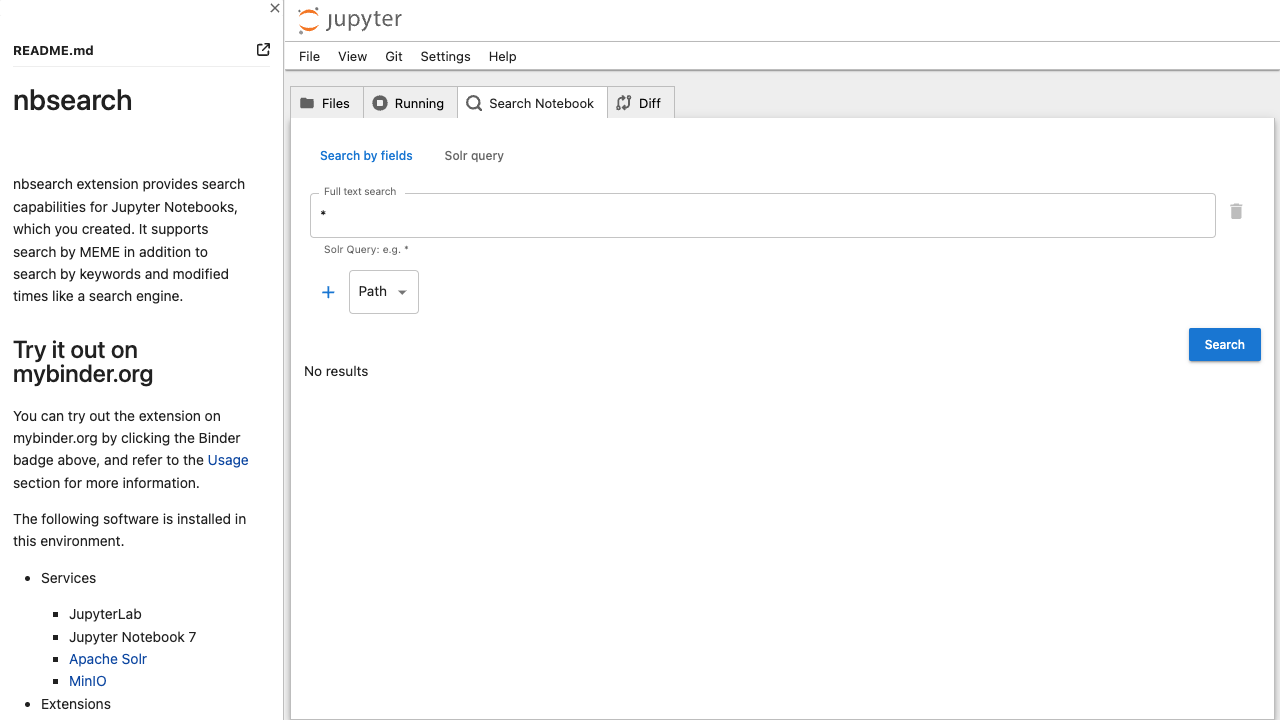

In [5]:
async def _step(page):
    # Click on the NBSearch icon in the left sidebar
    await page.locator('//*[@data-icon="nbsearch::notebooksearch"]').click()

    # Wait for the NBSearch panel to be visible
    await expect(page.locator('.nbsearch-search-root')).to_be_visible(timeout=transition_timeout)

await run_pw(_step)

## Perform a simple search

Start epoch: 1761020454.476035 seconds


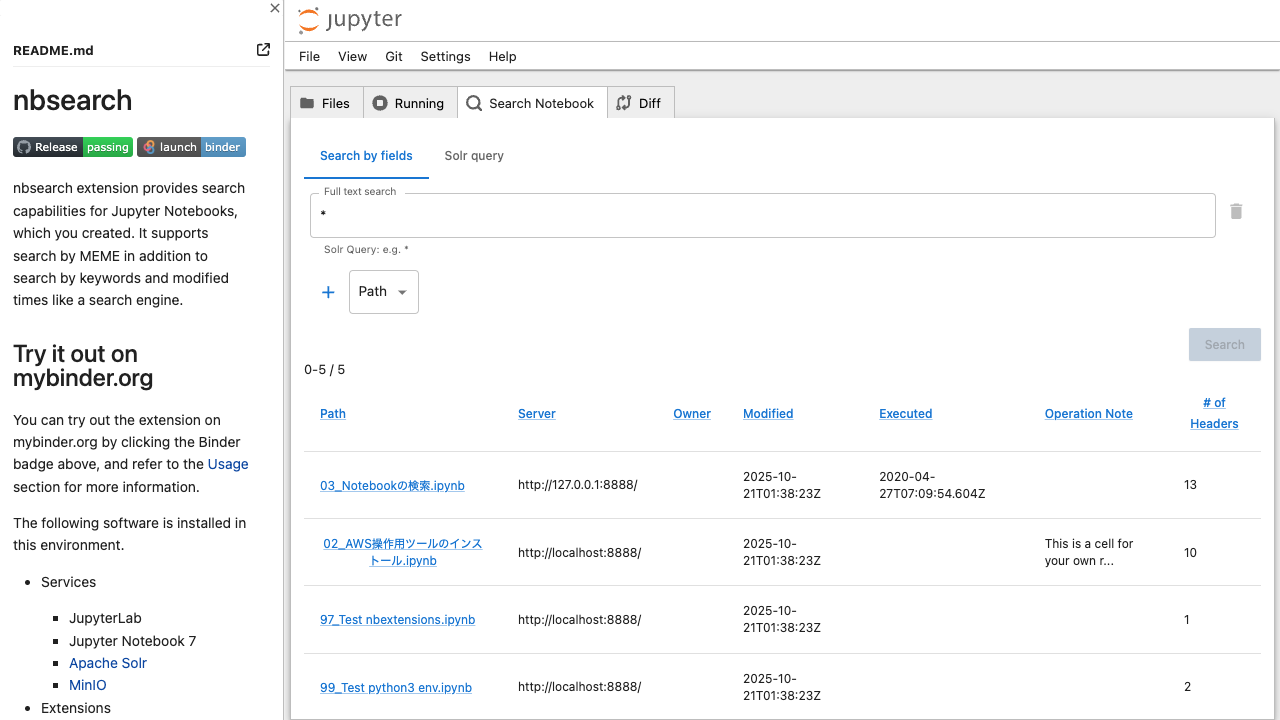

In [6]:
search_query = "*"

async def _step(page):
    # Find the search input field
    search_input = page.locator('.nbsearch-search-root input[type="text"]').first
    await search_input.fill(search_query)

    # Click the search button
    await page.locator('.nbsearch-search-execute button').click()

    # Wait for search results to appear
    await expect(page.locator('.MuiTableBody-root')).to_be_visible(timeout=transition_timeout)

await run_pw(_step)

## Input the search query and execute search

Start epoch: 1761020456.0182989 seconds
Number of search results: 5
Number of search results after new query: 2


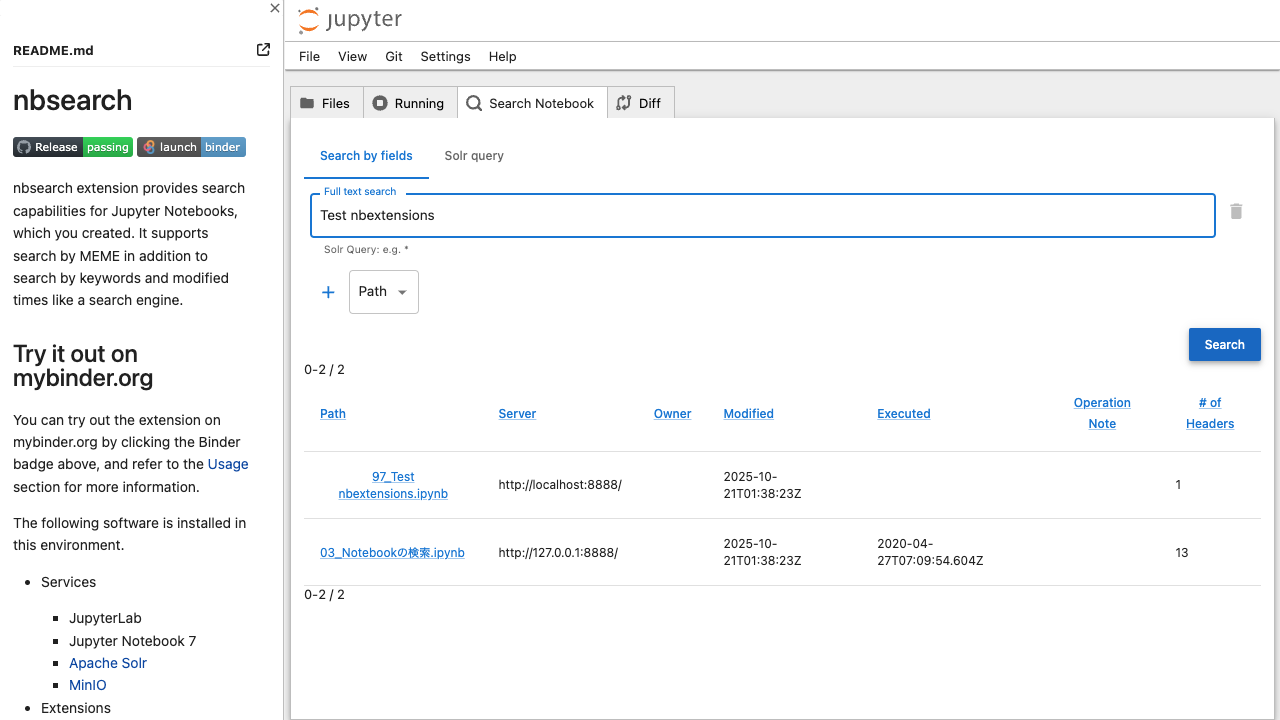

In [7]:
async def _step(page):
    # Count the number of search results
    results = page.locator('.MuiTableBody-root tr')
    count_before = await results.count()
    print(f"Number of search results: {count_before}")

    # Input a specific search query and press Enter to execute search
    await page.locator('.nbsearch-query-fields-value .MuiOutlinedInput-input').fill('Test nbextensions')
    await page.locator('.nbsearch-query-fields-value .MuiOutlinedInput-input').press('Enter')

    # Wait for search results to update
    await expect(page.locator('.MuiTableBody-root tr')).not_to_have_count(count_before, timeout=transition_timeout)
    count_after = await results.count()
    print(f"Number of search results after new query: {count_after}")
    assert count_after < count_before, "Search results did not update after new query"

await run_pw(_step)

## Click the first result row to open notebook in new tab

Start epoch: 1761020456.3051038 seconds
Notebook opened in new tab: http://localhost:8888/notebooks/nbsearch-tmp/97_Test%20nbextensions%20(1).ipynb


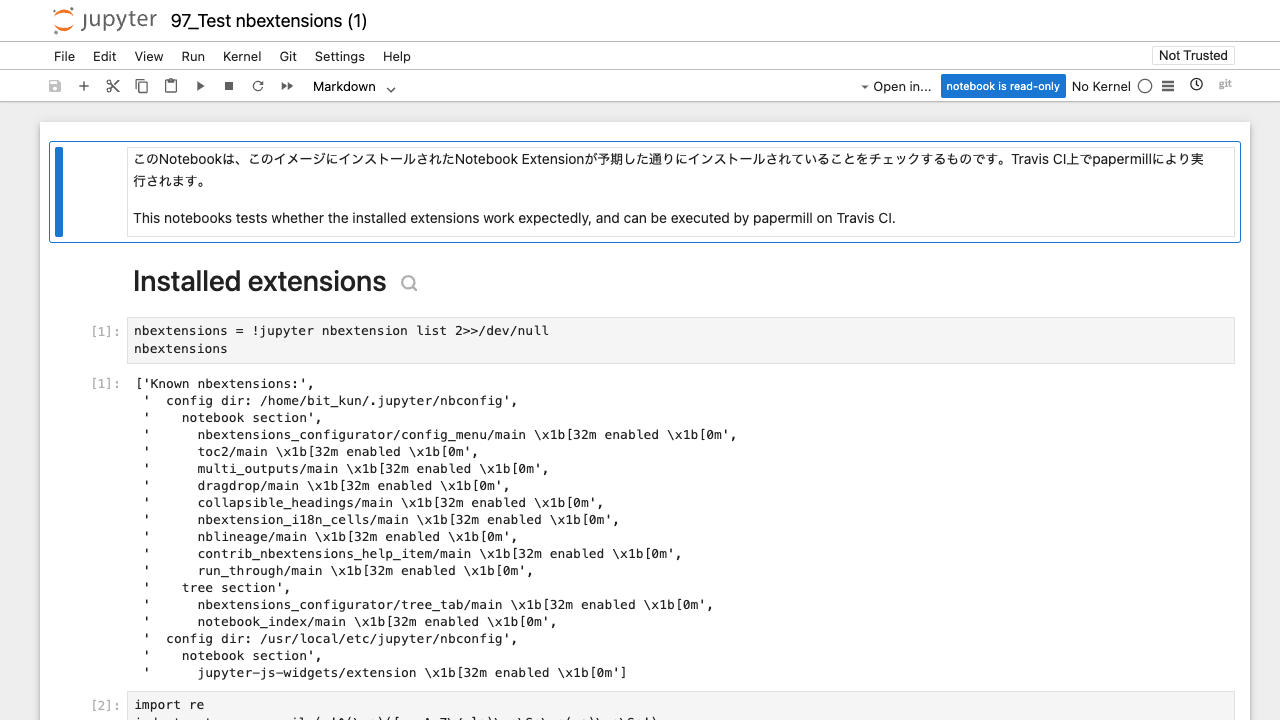

In [8]:
import re

notebook_popup = None

async def _step(page):
    # Wait for a new window (popup) to open when clicking the result
    popup_future = page.wait_for_event('popup')
    
    # Click on the first result row
    first_row = page.locator('.nbsearch-results-root .MuiTableBody-root tr').first
    await first_row.locator('button').click()
    
    # Wait for popup to open
    popup = await popup_future
    
    # Wait for the notebook to load in the new tab
    await expect(popup.locator('.jp-Notebook')).to_be_visible(timeout=transition_timeout)
    
    print(f"Notebook opened in new tab: {popup.url}")
    
    global notebook_popup
    notebook_popup = popup
    return popup

await run_pw(_step)

## Verify the notebook content is visible in the new tab

Start epoch: 1761020457.928343 seconds
Found 6 cells in the opened notebook


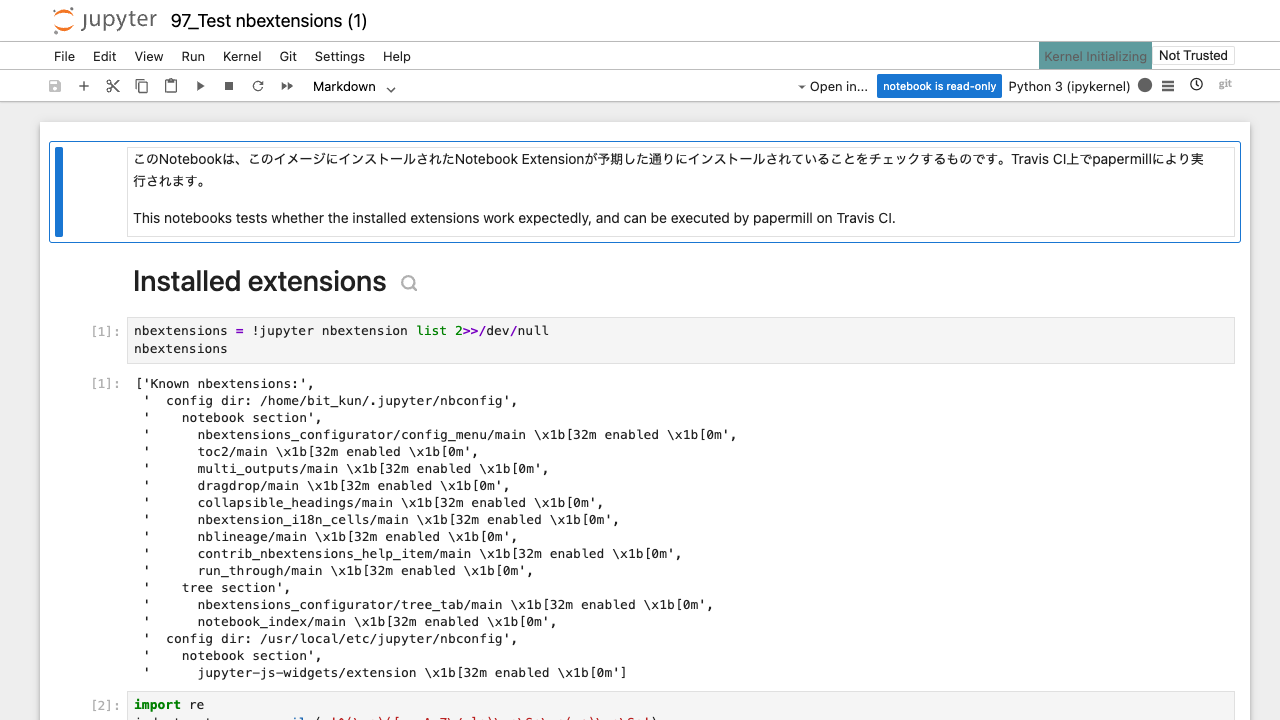

In [9]:
async def _step(page):
    # Verify that cells are visible in the opened notebook
    cells = page.locator('.jp-Cell')
    cell_count = await cells.count()
    
    print(f"Found {cell_count} cells in the opened notebook")
    assert cell_count > 0, "No cells found in the opened notebook"

await run_pw(_step)

## Clean up

In [10]:
await finish_pw_context()

Video: /var/folders/m0/myy2ys0s3cl_73__2gw8fw140000gn/T/tmp54d5qyc4/video-1.webm
Video: /var/folders/m0/myy2ys0s3cl_73__2gw8fw140000gn/T/tmp54d5qyc4/video-2.webm
HAR: /var/folders/m0/myy2ys0s3cl_73__2gw8fw140000gn/T/tmp54d5qyc4/har.zip


スクリーンキャプチャ動画の取得に失敗しました。
Traceback (most recent call last):
  File "/Users/yazawa/workspace/nii-cloud/nbsearch/ui-tests/e2e-notebook/notebooks/scripts/playwright.py", line 208, in _finish_pw_context
    shutil.copyfile(video_path, dest_video_path)
  File "/Users/yazawa/.pyenv/versions/3.11.5/lib/python3.11/shutil.py", line 256, in copyfile
    with open(src, 'rb') as fsrc:
         ^^^^^^^^^^^^^^^
FileNotFoundError: [Errno 2] No such file or directory: '/var/folders/m0/myy2ys0s3cl_73__2gw8fw140000gn/T/tmpvi_hz_ua/videos/a60966a3e59c7a9f0a4c04924dba62e0.webm'
スクリーンキャプチャ動画の取得に失敗しました。
Traceback (most recent call last):
  File "/Users/yazawa/workspace/nii-cloud/nbsearch/ui-tests/e2e-notebook/notebooks/scripts/playwright.py", line 208, in _finish_pw_context
    shutil.copyfile(video_path, dest_video_path)
  File "/Users/yazawa/.pyenv/versions/3.11.5/lib/python3.11/shutil.py", line 256, in copyfile
    with open(src, 'rb') as fsrc:
         ^^^^^^^^^^^^^^^
FileNotFoundError: [Errno 2] No such

In [11]:
!rm -fr {work_dir}